# Diamond detector

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from libra_toolbox.neutron_detection.diamond.process_data import DataProcessor

## Fabricate data

In [2]:
total_time_s = 200  # s
total_time_ps = total_time_s * 1e12  # s to ps

# peak 1
nb_counts_peak1 = int(2e4)
size_peak1 = nb_counts_peak1
time_values_out_peak1 = np.random.rand(size_peak1) * total_time_ps
mean_energy_peak1 = 4e6
std_energy_peak1 = 0.5e6
energy_values_peak1 = np.random.normal(mean_energy_peak1, std_energy_peak1, size_peak1)

# peak 2
nb_counts_peak2 = int(7e4)
size_peak2 = nb_counts_peak2
time_values_out_peak2 = np.random.rand(size_peak2) * total_time_ps
mean_energy_peak2 = 14e6
std_energy_peak2 = 1e6

energy_values_peak2 = np.random.normal(mean_energy_peak2, std_energy_peak2, size_peak2)

time_values_out = np.concatenate((time_values_out_peak1, time_values_out_peak2))
energy_values = np.concatenate((energy_values_peak1, energy_values_peak2))

# remove values where t between 100 and 150 s
mask = (time_values_out > 100e12) & (time_values_out < 150e12)
time_values_out = time_values_out[~mask]
energy_values = energy_values[~mask]

# write data to files
# make data directory if it doesn't exist
import os

if not os.path.exists("data"):
    os.makedirs("data")

np.savetxt(
    "data/data.csv",
    np.column_stack((time_values_out, energy_values)),
    delimiter=",",
)

## Read and process data

In [3]:
data_proc = DataProcessor()
data_proc.add_file("data/data.csv", time_column=0, energy_column=1, delimiter=",")

Added file: data/data.csv containing 67502 events


In [4]:
res_avg = data_proc.get_avg_rate(0, 100)

## Plot results

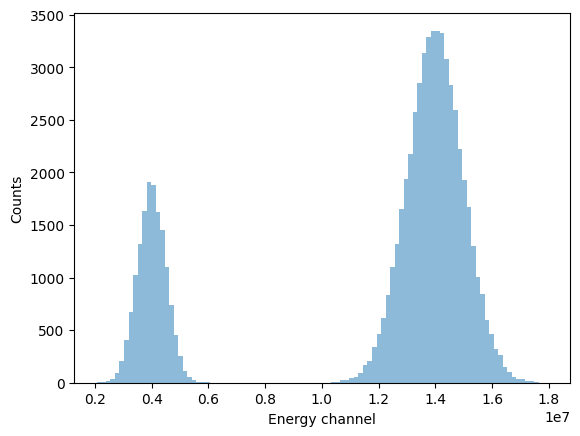

In [5]:
plt.hist(data_proc.energy_values, bins=100, alpha=0.5)
plt.xlabel("Energy channel")
plt.ylabel("Counts")
plt.show()

Average count rate: 450.19 +/- 2.12 count/s 


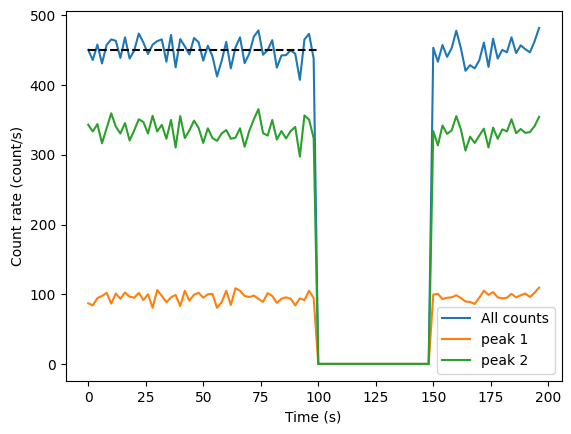

In [6]:
rates, bins = data_proc.get_count_rate(bin_time=2)

plt.plot(
    bins[:-1],
    rates,
    label="All counts",
)

rates, bins = data_proc.get_count_rate(
    bin_time=2,
    energy_window=(
        mean_energy_peak1 - std_energy_peak1 * 2,
        mean_energy_peak1 + std_energy_peak1 * 2,
    ),
)

plt.plot(
    bins[:-1],
    rates,
    label="peak 1",
)

rates, bins = data_proc.get_count_rate(
    bin_time=2,
    energy_window=(
        mean_energy_peak2 - std_energy_peak2 * 2,
        mean_energy_peak2 + std_energy_peak2 * 2,
    ),
)

plt.plot(
    bins[:-1],
    rates,
    label="peak 2",
)

avg_count_rate, error = data_proc.get_avg_rate(0, 100)
plt.hlines(avg_count_rate, 0, 100, color="black", linestyle="--")

print(f"Average count rate: {avg_count_rate:.2f} +/- {error:.2f} count/s ")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Count rate (count/s)")
plt.show()